# Hands-on Activity 2.1 : Dynamic Programming

#### Objective(s):

This activity aims to demonstrate how to use dynamic programming to solve problems.

#### Intended Learning Outcomes (ILOs):
* Differentiate recursion method from dynamic programming to solve problems.
* Demonstrate how to  solve real-world problems using dynamic programming


#### Resources:
* Jupyter Notebook


#### Procedures:

1. Create a code that demonstrate how to use recursion method to solve problem

In [ ]:
#FINDING A SUM OF A NUMBER FROM 1 UP TO THE INPUTTED NUMBER USING RECURSION
def summation(n):
  if n == 1:
    return 1
  if n == 0:
    return 0
  else:
    answer = n + summation(n-1)
    return answer

number = int(input("Enter a number to find its sum from 0 up to your number: "))
print(f"The sum from 0 to {number} is:",summation(number))

Enter a number to find its sum from 0 up to your number: 10
The sum from 0 to 10 is: 55


2. Create a program codes that demonstrate how to use dynamic programming to solve the same problem

In [ ]:
#FINDING THE SUM OF A NUMBER FROM 1 UP TO THE INPUTTED NUMBER USING DYNAMIC PROGRAMMING (MEMOIZATION)
memo = {}
def summation_memoization(n, memo):
  if n == 1:
    return 1
  if n == 0:
    return 0
  if n in memo:
    return memo[n]
  else:
    answer = n+summation_memoization(n-1, memo)
    memo[n] = answer
    return answer

number = int(input("Enter a number to find its sum from 0 up to your number: "))
print(f"The sum from 0 to {number} is:",summation_memoization(number, memo))

Enter a number to find its sum from 0 up to your number: 200
The sum from 0 to 200 is: 20100


##### Question:
Explain the difference of using the recursion from dynamic programming using the given sample codes to solve the same problem

[• In recurssion, we use the function again, if we somehow encounter the same equation that has been solved before, it will get solved again because of the recursion. In the memoization, the equation that has been solved is appended to a dictionary, if the code encounters the same equation, it will call the dictionary key and return its value.](https://)

3. Create a sample program codes to simulate bottom-up dynamic programming

In [ ]:
#FINDING THE SUM OF A NUMBER FROM 1 UP TO THE INPUTTED NUMBER USING DYNAMIC PROGRAMMING (TABULATION)
def summation_tabulation(n):
  if n == 0:
    print("Error!")
  else:
    table = [0] * (n+1)

    table[0] = 0
    for x in range(1, n+1):
        table[x] = table[x-1] + x
    return table[n]


number = int(input("Enter a number to find its sum from 0 up to your number: "))
print(f"The sum from 0 to {number} is:",summation_tabulation(number))

Enter a number to find its sum from 0 up to your number: 10
The sum from 0 to 10 is: 55


4. Create a sample program codes that simulate tops-down dynamic programming

In [ ]:
#FINDING THE SUM OF A NUMBER FROM 1 UP TO THE INPUTTED NUMBER USING DYNAMIC PROGRAMMING (MEMOIZATION)
memo = {}
def summation(n, memo):
  if n == 1:
    return 1
  if n == 0:
    return 0
  if n in memo:
    return memo[n]
  else:
    answer = n+summation(n-1, memo)
    memo[n] = answer
    return answer

number = int(input("Enter a number to find its sum from 0 up to your number: "))
print(f"The sum from 0 to {number} is:",summation(number, memo))

Enter a number to find its sum from 0 up to your number: 50
The sum from 0 to 50 is: 1275


#### Question:
 Explain the difference between bottom-up from top-down dynamic programming using the given sample codes

[In the top-down dynamic programming, they approach the problem using recursions, while the bottom-up dynamic programming, they approach the problem using iterations. ](https://)

0/1 Knapsack Problem

* Analyze three different techniques to solve knapsacks problem
1. Recursion
2. Dynamic Programming
3. Memoization

In [ ]:
#sample code for knapsack problem using recursion
def rec_knapSack(w, wt, val, n):

  #base case
  #defined as nth item is empty;
  #or the capacity w is 0
  if n == 0 or w == 0:
    return 0

  #if weight of the nth item is more than
  #the capacity W, then this item cannot be included
  #as part of the optimal solution
  if(wt[n-1] > w):
    return rec_knapSack(w, wt, val, n-1)

  #return the maximum of the two cases:
  # (1) include the nth item
  # (2) don't include the nth item
  else:
    return max(
        val[n-1] + rec_knapSack(
            w-wt[n-1], wt, val, n-1),
            rec_knapSack(w, wt, val, n-1))

In [ ]:
#To test:
val = [60, 100, 120] #values for the items
wt = [10, 20, 30] #weight of the items
w = 50 #knapsack weight capacity
n = len(val) #number of items

rec_knapSack(w, wt, val, n)

220

In [ ]:
#Dynamic Programming for the Knapsack Problem
def DP_knapSack(w, wt, val, n):
  #create the table
  table = [[0 for x in range(w+1)] for x in range (n+1)]

  #populate the table in a bottom-up approach
  for i in range(n+1):
    for w in range(w+1):
      if i == 0 or w == 0:
        table[i][w] = 0
      elif wt[i-1] <= w:
        table[i][w] = max(val[i-1] + table[i-1][w-wt[i-1]],
                          table[i-1][w])
  return table[n][w]
val = [60, 100, 120]
wt = [10, 20, 30]
w = 50
n = len(val)

DP_knapSack(w, wt, val, n)

220

In [ ]:
#To test:
val = [60, 100, 120]
wt = [10, 20, 30]
w = 50
n = len(val)

DP_knapSack(w, wt, val, n)

220

In [ ]:
#Sample for top-down DP approach (memoization)
#initialize the list of items
val = [60, 100, 120]
wt = [10, 20, 30]
w = 50
n = len(val)

#initialize the container for the values that have to be stored
#values are initialized to -1
calc =[[-1 for i in range(w+1)] for j in range(n+1)]


def mem_knapSack(wt, val, w, n):
  #base conditions
  if n == 0 or w == 0:
    return 0
  if calc[n][w] != -1:
    return calc[n][w]

  #compute for the other cases
  if wt[n-1] <= w:
    calc[n][w] = max(val[n-1] + mem_knapSack(wt, val, w-wt[n-1], n-1),
                     mem_knapSack(wt, val, w, n-1))
    return calc[n][w]
  elif wt[n-1] > w:
    calc[n][w] = mem_knapSack(wt, val, w, n-1)
    return calc[n][w]

mem_knapSack(wt, val, w, n)

220

**Code Analysis**

Type your answer here.

## Seatwork 2.1

Task 1: Modify the three techniques to include additional criterion in the knapsack problems

In [ ]:
#RECURSION
def rec_knapSack(w, wt, val, n):

  if n == 0 or w == 0:
    return 0

  if(wt[n-1] > w):
    return rec_knapSack(w, wt, val, n-1)
  else:
    return max(
        val[n-1] + rec_knapSack(
            w-wt[n-1], wt, val, n-1),
            rec_knapSack(w, wt, val, n-1))

val = [60, 100, 120, 500, 200, 66, 69, 143, 7]
wt = [10, 20, 30, 40, 50, 11, 15, 16, 17]
w = 90
n = len(val)

rec_knapSack(w, wt, val, n)

809

In [ ]:
#DYNAMIC TABULATION
def DP_knapSack(w, wt, val, n):
  table = [[0 for x in range(w+1)] for x in range (n+1)]

  for i in range(n+1):
    for w in range(w+1):
      if i == 0 or w == 0:
        table[i][w] = 0
      elif wt[i-1] <= w:
        table[i][w] = max(val[i-1] + table[i-1][w-wt[i-1]],
                          table[i-1][w])
  return table[n][w]

val = [60,70]
wt = [10, 20, 30, 40, 50, 11, 15, 16, 17]
w = 20
n = len(val)

DP_knapSack(w, wt, val, n)

70

In [ ]:
#DYNAMIC MEMOIZATION
val = [60, 80, 120, 120, 120, 120, 120]
wt = [5, 5, 10, 1,2 ,3 ,4 ,5]
w = 1
n = len(val)

calc =[[-1 for i in range(w+1)] for j in range(n+1)]


def mem_knapSack(wt, val, w, n):
  if n == 0 or w == 0:
    return 0
  if calc[n][w] != -1:
    return calc[n][w]

  if wt[n-1] <= w:
    calc[n][w] = max(val[n-1] + mem_knapSack(wt, val, w-wt[n-1], n-1),
                     mem_knapSack(wt, val, w, n-1))
    return calc[n][w]
  elif wt[n-1] > w:
    calc[n][w] = mem_knapSack(wt, val, w, n-1)
    return calc[n][w]

mem_knapSack(wt, val, w, n)

120

## Supplementary Problem (HOA 2.1 Submission):
* Choose a real-life problem
* Use recursion and dynamic programming to solve the problem

Below is the lists of the available projects for you to perform. Each of them have their own estimated days of creation and the amount of payment you will received once you have completed the project. You only have limited days to perform the projects and you want to know how much you can earn during your vacant days.

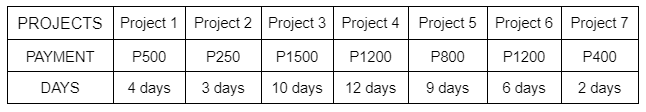

In [ ]:
#SOLVING THE PROBLEM USING RECURSSION

def rec_knapSack(vac, d, pay, n):

  if n == 0 or vac == 0:
    return 0

  if(d[n-1] > vac):
    return rec_knapSack(vac, d, pay, n-1)

  else:
    return max(
        pay[n-1] + rec_knapSack(vac-d[n-1], d, pay, n-1),rec_knapSack(vac, d, pay, n-1))

vacant = int(input("Enter the how many vacant days you have: "))
#proj = ["Project 1", "Project 2", "Project 3", "Project 4", "Project 5", "Project 6", "Project 7", ]
payment = [500, 250, 1500, 1200, 800, 1200, 400]
days = [4, 3, 10, 12, 9, 6, 2]
n = len(payment)

print("The maximum amount of payment you can receive is", rec_knapSack(vacant, days, payment, n),"Pesos", f"within the vacant of {vacant} days")

Enter the how many vacant days you have: 20
The maximum amount of payment you can receive is 3200 Pesos within the vacant of 20 days


In [ ]:
#SOLVING THE PROBLEM USING DYNAMIC PROGRAMMING (MEMOIZATION)

vacant = int(input("Enter the how many vacant days you have: "))
payment = [500, 250, 1500, 1200, 800, 1200, 400]
days = [4, 3, 10, 12, 9, 6, 2]
n = len(payment)

calc =[[-1 for i in range(vacant+1)] for j in range(n+1)]


def mem_knapSack(d, pay, vac, n):
  if n == 0 or vac == 0:
    return 0
  if calc[n][vac] != -1:
    return calc[n][vac]

  if d[n-1] <= vac:
    calc[n][vac] = max(pay[n-1] + mem_knapSack(d, pay, vac-d[n-1], n-1),
                     mem_knapSack(d, pay, vac, n-1))
    return calc[n][vac]
  elif d[n-1] > vac:
    calc[n][vac] = mem_knapSack(d, pay, vac, n-1)
    return calc[n][vac]

print("The maximum amount of payment you can receive is", mem_knapSack(days, payment, vacant, n),"Pesos", f"within the vacant of {vacant} days")

Enter the how many vacant days you have: 5
The maximum amount of payment you can receive is 650 Pesos within the vacant of 5 days


In [ ]:
#SOLVING THE PROBLEM USING DYNAMIC PROGRAMMING (TABULATION)
def DP_knapSack(w, wt, val, n):
  table = [[0 for x in range(w+1)] for x in range (n+1)]

  for i in range(n+1):
    for w in range(w+1):
      if i == 0 or w == 0:
        table[i][w] = 0
      elif wt[i-1] <= w:
        table[i][w] = max(val[i-1] + table[i-1][w-wt[i-1]],
                          table[i-1][w])
  return table[n][w]

vacant = int(input("Enter the how many vacant days you have: "))
payment = [500, 250, 1500, 1200, 800, 1200, 400]
days = [4, 3, 10, 12, 9, 6, 2]
n = len(payment)

print("The maximum amount of payment you can receive is", DP_knapSack(vacant, days, payment, n),"Pesos", f"within the vacant of {vacant} days")

Enter the how many vacant days you have: 5
The maximum amount of payment you can receive is 400 Pesos within the vacant of 5 days


#### Conclusion

• Different aprroaches can be used in solving a problem using programming, in this activity, we have tried different techniques to solve knapsack problem, like the recursion, tabulation, and memoization. All of them have their own advantages and disadvantages, depending on which problem are you trying to solve.

• In the recursion, we do not use temporary storage for the solved equation. For example, we are now starting to backtrack solving our fibonacci function, if you have solved an equation(ex: fibonacci(2)), and we encounter it once again during our backtracking, the code will try to solve it again. Unlike in the memoization, if the code have solved an equation (same example as above), it will get stored in a dictionary so that whenever we encounter the same equation, the key of the dictionary will get called instead to return its value.